# Amusing Algorithms 🤖
### [@maxhumber](https://twitter.com/maxhumber)
##### 🌉 PyBay 2018
<img src='images/max.png' width=200 height=200 style="float: right; margin: 0px 15px 15px 0px;">
<br>
<br>
<br>
[github.com/maxhumber/amusing_algorithms](https://github.com/maxhumber/amusing_algorithms)

<img src='images/algorithm.png' width=500 height=500 align='middle'>

<img src='images/algorithm_wiki.jpg' width=700 height=500 align='middle'>

<img src='images/algorithm_youtube.png' width=800 height=500 align='middle'>

<img src='images/recipe.png' width=700 height=500 align='middle'>

<img src='images/celcius.jpeg' width=400 height=500 align='middle'>

<img src='images/ml_algorithms.png' width=700 height=500 align='middle'>

In ‘Amusing Algorithms’ we’ll cut through the math and try to understand the mechanics of a few interesting and useful algorithms. We’ll use **Jupyter** 📒 to expose data structures, intermediate steps, and simulations of various algorithms. And we’ll try to use algorithms to answer real life questions like how to **find love** ❤️ in a crowded bar, how to **buy the best scalpers tickets** 🎟 at a baseball game, and how to figure out when **you should leave your job** 🙅🏻‍♀️.

# - Optimal Stopping 🛑
# - Stable Marriage 💒
# - Simulated Annealing ⚔️

# Optimal Stopping 🛑

Imagine an administrator who wants to hire the best secretary out of n rankable applicants for a position. The applicants are interviewed one by one in random order. A decision about each particular applicant is to be made immediately after the interview. Once rejected, an applicant cannot be recalled. During the interview, the administrator can rank the applicant among all applicants interviewed so far, but is unaware of the quality of yet unseen applicants. The question is about the optimal strategy to maximize the probability of selecting the best applicant. 

<img src='images/37.png' height='600' width='400' align='middle'>

<img src='images/bluejays.png' width=500 height=500 align='middle'>

<img src='images/scalper.png' width=500 height=500 align='middle'>

<img src='images/diamond.png' width=600 height=600 align='middle'>

In [1]:
low = 8
high = 24
N = 15

In [2]:
import random
random.seed(14)

options = [random.randint(low, high) for i in range(N)]

print(options)

[11, 24, 15, 16, 16, 17, 10, 22, 17, 22, 20, 20, 11, 16, 15]


In [3]:
for _ in range(5):
    options = [random.randint(low, high) for i in range(N)]
    print(options, '\n')

[18, 19, 16, 19, 24, 12, 13, 16, 13, 8, 10, 11, 18, 8, 10] 

[16, 14, 20, 20, 22, 11, 11, 19, 13, 11, 23, 24, 14, 16, 22] 

[14, 23, 17, 24, 16, 11, 11, 10, 16, 16, 11, 8, 13, 21, 11] 

[24, 10, 21, 23, 13, 20, 22, 17, 23, 22, 21, 21, 11, 16, 23] 

[20, 15, 22, 23, 10, 12, 23, 16, 22, 8, 20, 21, 8, 19, 19] 



<img src='images/rogers.png' width=600 height=600 align='middle'>

In [4]:
random.seed(14)
options = [random.randint(low, high) for i in range(N)]
print(options)

[11, 24, 15, 16, 16, 17, 10, 22, 17, 22, 20, 20, 11, 16, 15]


# 🤖

1. Estimate how many possible options there are
2. Multiply that # by `1/e` or ~ 37%
3. Evaluate that # of options to establish a benchmark
4. Continue until you find an option that exceeds the benchmark


### 🐍

In [5]:
import math
skip = int(len(options) / math.e)

bench = options[0]
for i, option in enumerate(options):
    if i < skip:
        if option <= bench:
            bench = option
    else:
        if option <= bench:
            break

In [6]:
print(skip)

5


In [7]:
print(f'Options: {options}')
print(f'Benchmark: {bench}')
print(f'Choice: {option} at position {i+1}/{len(options)}')

Options: [11, 24, 15, 16, 16, 17, 10, 22, 17, 22, 20, 20, 11, 16, 15]
Benchmark: 11
Choice: 10 at position 7/15


### Refactor 💄

In [8]:
skip = int(len(options) / math.e)
bench = min(options[:skip])

for option in options[skip:]:
    if option <= bench:
        break

In [9]:
def create_options(low=8, high=24, N=15):
    return [random.randint(low, high) for i in range(N)]

In [10]:
print(create_options(8, 24, 15))
print('\n')
print(create_options(60, 100, 10))

[18, 19, 16, 19, 24, 12, 13, 16, 13, 8, 10, 11, 18, 8, 10]


[77, 73, 84, 85, 97, 88, 98, 66, 67, 97]


### Refactor 💄

In [11]:
def buy(options, strategy='optimal'):
    if strategy == 'first':
        choice = options[0]
    if strategy == 'random':
        choice = random.choice(options)
    if strategy == 'optimal':
        skip = int(len(options) / math.e)
        bench = min(options[:skip])
        for option in options[skip:]:
            if option <= bench:
                break
        choice = option
    return 1 if choice == min(options) else 0

### Simulate ⏳

In [12]:
outcomes = []
for i in range(1000):
    outcome = buy(create_options(low=8, high=24, N=15), 'optimal')
    outcomes.append(outcome)
sum(outcomes) / len(outcomes)

0.488

In [13]:
outcomes = []
for i in range(1000):
    outcome = buy(create_options(8, 24, 15), 'first')
    outcomes.append(outcome)
sum(outcomes) / len(outcomes)

0.088

In [14]:
outcomes = []
for i in range(1000):
    outcome = buy(create_options(8, 24, 15), 'random')
    outcomes.append(outcome)
sum(outcomes) / len(outcomes)

0.088

### 🧠

```
skip = 37% 

for option in options[skip:]:
    if option <= bench:
        break
```

# Stable Marriage 💒

Given n men and n women, where each person has ranked all members of the opposite sex in order of preference, marry the men and women together such that there are no two people of opposite sex who would both rather have each other than their current partners. When there are no such pairs of people, the set of marriages is deemed stable.

### Friends 👫👫👫
<img src='images/friends.png' width=500 height=500 align='middle'>

### Data Structures 👷‍♂️

In [15]:
class Person:
    def __init__(self, name, preferences):
        self.name = name
        self.partner = None
        self.preferences = preferences

    def __repr__(self):
        if self.partner:
            return f'{self.name} ⚭ {self.partner}'
        else:
            return f'{self.name} ⌀'

In [16]:
ross = Person('Ross', ['Rachel', 'Phoebe', 'Monia'])
print('Name:', ross)
print('Partner:', ross.partner)

Name: Ross ⌀
Partner: None


In [17]:
ross.partner = 'Rachel'
print(ross)

Ross ⚭ Rachel


### Functions 🍱

<img src='images/functions.png' width=500 height=500 align='middle'>

In [18]:
import copy

class Alpha(Person):
    def __init__(self, name, preferences):
        super().__init__(name, preferences)
        self.not_asked = copy.deepcopy(preferences)

    def ask(self):
        return self.not_asked.pop(0)

In [19]:
class Beta(Person):
    def __init__(self, name, preferences):
        super().__init__(name, preferences)

    def accept(self, suitor):
        return self.partner is None or (
            self.preferences.index(suitor) <
            self.preferences.index(self.partner)
        )

### Preferences 💏

In [20]:
people = {
    "Men": {
        "Ross": ["Rachel", "Phoebe", "Monica"],
        "Chandler": ["Rachel", "Monica", "Phoebe"],
        "Joey": ["Phoebe", "Rachel", "Monica"]
    },
    "Women": {
        "Rachel": ["Joey", "Ross", "Chandler"],
        "Phoebe": ["Ross", "Chandler", "Joey"],
        "Monica": ["Joey", "Chandler", "Ross"]
    }
}

### Initialize 🌱

In [21]:
def setup():
    global alphas
    global betas
    
    alphas = {}
    for key, value in people.get('Men').items():
        alphas[key] = Alpha(key, value)
    betas = {}
    for key, value in people.get('Women').items():
        betas[key] = Beta(key, value)

In [22]:
setup()
print('A:', alphas)
print('B:', betas)

A: {'Ross': Ross ⌀, 'Chandler': Chandler ⌀, 'Joey': Joey ⌀}
B: {'Rachel': Rachel ⌀, 'Phoebe': Phoebe ⌀, 'Monica': Monica ⌀}


In [23]:
unmatched = list(alphas.keys())
print(unmatched)

['Ross', 'Chandler', 'Joey']


# 🤖

1. Each unengaged man proposes to the woman he prefers most
2. Each woman says "maybe" to the suitor she most prefers and "no" to all other suitors
3. Continue while there are still unengaged men

In [24]:
while unmatched:
    alpha = alphas[random.choice(unmatched)]
    beta = betas[alpha.ask()]
    if beta.accept(alpha.name):
        if beta.partner:
            ex = alphas[beta.partner]
            ex.partner = None
            unmatched.append(ex.name)
        unmatched.remove(alpha.name)
        alpha.partner, beta.partner = beta.name, alpha.name

In [25]:
print(alphas)
print(betas)

{'Ross': Ross ⚭ Rachel, 'Chandler': Chandler ⚭ Monica, 'Joey': Joey ⚭ Phoebe}
{'Rachel': Rachel ⚭ Ross, 'Phoebe': Phoebe ⚭ Joey, 'Monica': Monica ⚭ Chandler}


<img src='images/buller.png' width=700 height=500 align='middle'>

# 🏎    ➡️  ➡️   ➡️   🐢

In [26]:
while unmatched:
    alpha = alphas[random.choice(unmatched)]
    beta = betas[alpha.ask()]
    if beta.accept(alpha.name):
        if beta.partner:
            ex = alphas[beta.partner]
            ex.partner = None
            unmatched.append(ex.name)
        unmatched.remove(alpha.name)
        alpha.partner, beta.partner = beta.name, alpha.name

In [27]:
import time
random.seed(1993)
setup()
unmatched = list(alphas.keys())

while unmatched:
    alpha = alphas[random.choice(unmatched)]
    beta = betas[alpha.ask()]
    print(f'{alpha.name} asks {beta.name}')
    time.sleep(0.8)
    if beta.accept(alpha.name):
        print(f'{beta.name} accepts')
        if beta.partner:
            ex = alphas[beta.partner]
            print(f'{beta.name} dumps {ex.name}')
            ex.partner = None
            unmatched.append(ex.name)
        unmatched.remove(alpha.name)
        alpha.partner, beta.partner = beta.name, alpha.name
    else:
        print(f'{beta.name} rejects')
    time.sleep(0.8)
    print()
print('Everyone is matched! And things are stable 💪')

Chandler asks Rachel
Rachel accepts

Joey asks Phoebe
Phoebe accepts

Ross asks Rachel
Rachel accepts
Rachel dumps Chandler

Chandler asks Monica
Monica accepts

Everyone is matched! And things are stable 💪


In [28]:
def print_pairings(people):
    for p in people.values():
        if p.partner:
            print(f'{p.name} is paired with {p.partner} ({p.preferences.index(p.partner) + 1})')
        else:
            print(f'{p.name} is not paired')

In [30]:
print_pairings(alphas)
print('\n')
print_pairings(betas)

Ross is paired with Rachel (1)
Chandler is paired with Monica (2)
Joey is paired with Phoebe (1)


Rachel is paired with Ross (2)
Phoebe is paired with Joey (3)
Monica is paired with Chandler (2)


<img src='images/friends.png' width=500 height=500 align='middle'>

<img src='images/friends_men.png' width=500 height=500 align='middle'>

In [31]:
alphas = {}
for key, value in people.get('Women').items():
    alphas[key] = Alpha(key, value)
betas = {}
for key, value in people.get('Men').items():
    betas[key] = Beta(key, value)

unmatched = list(alphas.keys())

In [32]:
while unmatched:
    alpha = alphas[random.choice(unmatched)]
    beta = betas[alpha.ask()]
    if beta.accept(alpha.name):
        if beta.partner:
            ex = alphas[beta.partner]
            ex.partner = None
            unmatched.append(ex.name)
        unmatched.remove(alpha.name)
        alpha.partner, beta.partner = beta.name, alpha.name

In [33]:
print_pairings(alphas)
print('\n')
print_pairings(betas)

Rachel is paired with Joey (1)
Phoebe is paired with Ross (1)
Monica is paired with Chandler (2)


Ross is paired with Phoebe (2)
Chandler is paired with Monica (2)
Joey is paired with Rachel (2)


<img src='images/friends_men.png' width=500 height=500 align='middle'>

<img src='images/friends_women.png' width=500 height=500 align='middle'>

### 🧠

> "Pearls don’t lie on the seashore. If you want one, you must dive for it."

— Chinese proverb


> "Opportunity dances with those on the dance floor."

— Anonymous


# Simulated Annealing ⚔️

<img src='images/got.png' width=800 height=500 align='middle'>

<img src='images/annealing_metal.jpg' width=700 height=500 align='middle'>

Imagine you are situated at the bottom of a mountain, and you want to make your way up by foot to the highest point in the valley. But you cannot see beyond your feet, so your algorithm is simply to keep heading uphill. You do that, and eventually, half way up the mountain, you end up at the top of a small peak, from which all paths lead down. As far as you can nearsightedly tell, you’ve reached the highest point. But it’s a local maximum, not truly the top of the mountain, and you’re not where you need to be. 

What would be a better algorithm for someone with purely local vision? Simulated annealing, inspired by sword makers.

### Setup 💼

In [34]:
def clamp(x, low, high):
    return max(min(x, high), low)

In [35]:
def linspace(low, high, steps):
    return [low + x * (high - low)/steps for x in range(steps)]

In [36]:
import math

def f(x):
    x = clamp(x, 0, 10)
    return x * math.sin(x) + x * math.cos(2 * x) + 10

In [37]:
xs = linspace(0, 10, 100)
ys = [f(x) for x in xs]

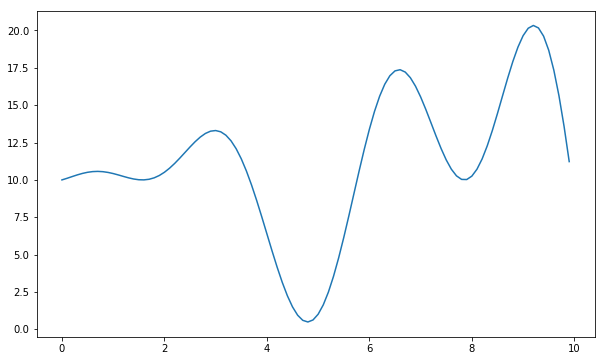

In [38]:
from matplotlib import pyplot as plt
%matplotlib inline

plt.figure(figsize=(10, 6))
plt.plot(xs, ys)

In [39]:
x = 4
fx = f(x)
print(fx)

6.390789883533833


In [40]:
x = 5
fx = f(x)
print(fx)

1.0100209813020449


In [41]:
import random 

random.seed(1993)
x2 = x + random.choice([-1, 1]) * 0.001
fx2 = f(x2)
print(fx)
print(fx2)

1.0100209813020449
1.015093665555547


In [42]:
if fx2 > fx:
    print('fx2 is better')
    x, fx = x2, fx
else:
    print('fx2 is worse')

fx2 is better


# 💄

In [43]:
def hill_climb(x, f, steps=1000):
    fx = f(x)
    for i in range(steps):
        x2 = x + random.choice([-1, 1]) * 0.01
        fx2 = f(x2)
        if fx2 > fx:
            x, fx = x2, fx2
    return x, fx

In [44]:
hill_climb(4, f)

(2.9800000000000217, 13.30517440563907)

In [45]:
hill_climb(5, f)

(6.579999999999966, 17.378756955031456)

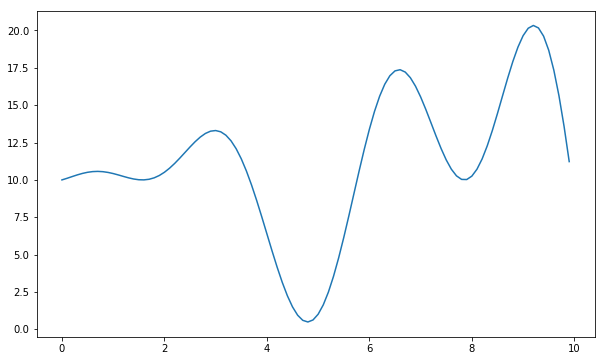

In [46]:
plt.figure(figsize=(10, 6))
plt.plot(xs, ys)
# plt.scatter(4, f(4), c='r')
# plt.scatter(5, f(5), c='k')

<img src='images/career_ladder.jpeg' width=700 height=500 align='middle'>

> When the ascent in the simulated annealing algorithm takes you to some maximum, you sometimes take a chance and shake things up at random, in the hope that by sometimes shaking yourself out of the local maximum and temporarily moving lower, (which is not where you ultimately want to be), you may then find your way to a lower and more stable global maximum. 

### Pseudocode 📄

```
Let s = s0
For k = 0 through kmax (exclusive):
T ← temperature(k ∕ kmax)
Pick a random neighbour, snew ← neighbour(s)
If P(E(s), E(snew), T) ≥ random(0, 1):
s ← snew
Output: the final state s
```

In [ ]:
def prob(old, new, temperature):
    # if trying to minimize: math.exp(-(new - old) / temperature)
    return math.exp(-(old - new) / temperature)

In [ ]:
old = 10
new = 9

In [ ]:
print(prob(old, new, temperature=10))
print(prob(old, new, temperature=1))

In [ ]:
temperature = 1000
a = 0.99
for _ in range(1000):
    print(temperature)
    temperature *= a

In [ ]:
current = 4
temperature = 1000
alpha = 0.90

for _ in range(100):
    new = random.uniform(0, 10)
    if prob(f(current), f(new), temperature) >= random.random():
        current = new
    print(current)
    temperature *= alpha

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(xs, ys)

In [ ]:
import pathlib
import re
import random
import imageio

In [ ]:
random.seed(1993)
current = 4
temperature = 1000
alpha = 0.90

x = [current]
y = [f(current)]
t = [temperature]

for _ in range(99):
    new = random.uniform(0, 10)
    if prob(f(current), f(new), temperature) >= random.random():
        current = new
    x.append(current)
    y.append(f(current))
    t.append(temperature)
    temperature *= alpha

In [ ]:
print(len(x))
print(len(y))
print(len(t))

In [ ]:
# create temp path for deletion later
p = pathlib.Path('temp/')
p.mkdir(parents=True, exist_ok=True)

# build all of the individual graphs
for i in range(len(x)):
    plt.figure(figsize=(10, 6))
    plt.plot(xs, ys, c='k', alpha=0.5)
    plt.scatter(x[:i], y[:i], c='r', alpha=0.25)
    try:
        plt.axvline(x[:i][-1])
        plt.title(f'Temperature {round(t[:i][-1], 4)}')
    except IndexError:
        pass
    plt.ylim(-2, 22)
    plt.xlim(0, 10)
    plt.savefig(p / f'{i}.png')

In [ ]:
filenames = [str(x) for x in p.glob('*.png')]
filenames.sort(key=lambda x: int(re.sub('\D', '', x)))

# build gif and clean up pictures
images = []
for filename in filenames:
    images.append(imageio.imread(filename))
imageio.mimsave('images/sim_anneal.gif', images, duration=0.1)

In [ ]:
[x.unlink() for x in p.iterdir()]
p.rmdir()

img src='images/sim_anneal.gif' width=700 height=500 align='middle'>

# 🧠

> Simulated annealing employs judicious volatility in the hope that it will be beneficial. In an impossibly complex world, we should perhaps shun temporary stability and instead be willing to tolerate a bit of volatility in order to find a greater stability thereafter.

<img src='images/brilliant.png' width=300 height=500 align='middle'>

<img src='images/love_book.png' width=300 height=500 align='middle'>

<img src='images/atlb.png' height='400' width='300' align='middle'>

# Shameless Plug 

<img src='images/personal_finance.png' width=700 height=500 align='middle'>

# Speakerdeck: [/maxhumber](https://speakerdeck.com/maxhumber)
# LinkedIn: [/maxhumber](https://speakerdeck.com/maxhumber)
# Twitter: [@maxhumber](https://twitter.com/maxhumber)